## Deformation Project

#### Imports

In [140]:
from src.hartree_fock_library import HartreeFock,HartreeFockVariational,gram_schmidt
from src.hamiltonian_utils import get_twobody_nuclearshell_model,FermiHubbardHamiltonian,SingleParticleState
import numpy as np
import torch
from typing import Dict,List
from src.qml_models import AdaptVQEFermiHubbard
from src.qml_utils.train import Fit
from src.qml_utils.utils import configuration
#from src.qml_models import AdaptVQEFermiHubbard
import matplotlib.pyplot as plt
#from adapt_vqe_old import AdaptVQEFermiHubbard

#### The parameters

In [167]:
file_name='data/usdb.nat'

twobody_matrix,energies=get_twobody_nuclearshell_model(file_name=file_name)

SPS=SingleParticleState(file_name=file_name)



label=[]
for i in range(energies.shape[0]):
    
    n,l,j,m,i,iz=SPS.state_encoding[i]
    label.append([(j,m,iz)])


Computing the matrix, pls wait... (u_u) 



  0%|          | 0/24 [00:00<?, ?it/s]

In [163]:
alfa=1
size_a=energies.shape[0]//2
size_b=0
nparticles_a=2
nparticles_b=0

#### The Hamiltonian

In [164]:


#%% initialize the FH Hamiltonian

FHHamiltonian=FermiHubbardHamiltonian(size_a=size_a,size_b=size_b,nparticles_a=nparticles_a,nparticles_b=nparticles_b,symmetries=None)


print(FHHamiltonian.basis.shape)



FHHamiltonian.get_external_potential(external_potential=energies[:size_a+size_b])
FHHamiltonian.get_twobody_interaction(twobody_dict=twobody_matrix)
FHHamiltonian.twobody_operator=alfa*FHHamiltonian.twobody_operator
FHHamiltonian.get_hamiltonian()

es,psi0=FHHamiltonian.get_spectrum(n_states=1)

print(es[0])


(66, 12)
-20.96756853570043


#### The mutual info

In [165]:
mutual_info=FHHamiltonian.mutual_info(psi=psi0[:,0])

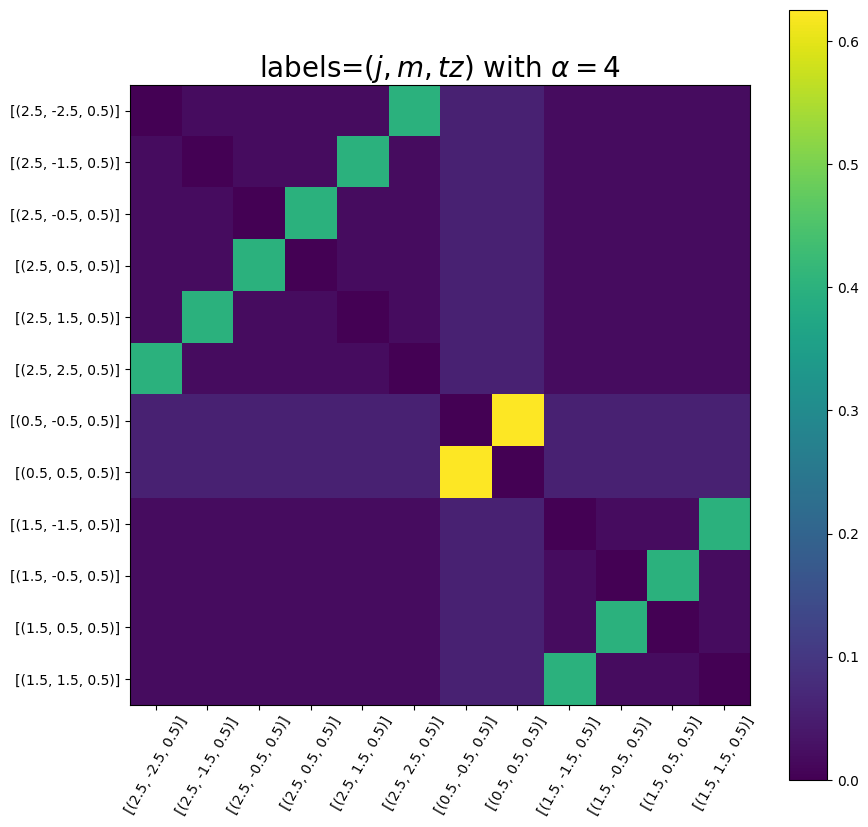

In [166]:

plt.figure(figsize=(10,10))
plt.imshow(mutual_info)
plt.colorbar()
plt.xticks(np.arange(energies.shape[0])[:size_a],label[:size_a],rotation=60)
plt.yticks(np.arange(energies.shape[0])[:size_a],label[:size_a])
plt.title(r'labels=$(j,m,tz)$ with $\alpha=$'+f'{alfa}',fontsize=20)
plt.savefig(f'images/deformation/o18_mutual_info_usdb_p_{alfa}.png')
plt.show()